# Functions

In [4]:
import functions_paper_1
import importlib
from functions_paper_1 import *
exec(open("functions_paper_1.py").read())
# Local path to Sharepoint (on your computer, change if you are a different user)
#datadir = Path(Path('../datadir_yb.txt').read_text())
datadir = Path(Path('../../datadir_srk.txt').read_text())
datadir = Path(Path('../datadir_srk.txt').read_text())
figure_folder = './figs_2024_promoter_editing_paper/f_diff-min-prom/'

AttributeError: module 'matplotlib.cm' has no attribute 'register_cmap'

# Data

## Import Data

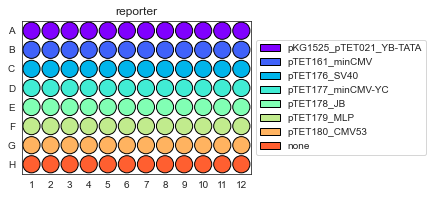

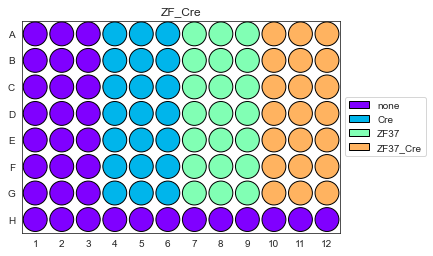

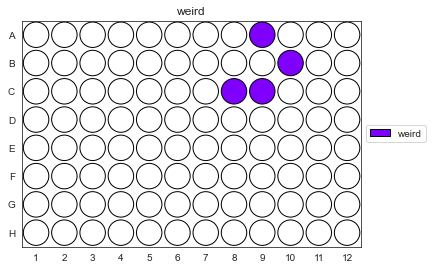

In [2]:
# Import Data - bioreplicate 1
folder = '20241104_ZF-diff-min-prom'
# instruments\data\attune\Mary\2024.08.26_exp09.16_minCMV\Plate2_minCMV_SRK\export_singlets
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
rd.plot.plot_well_metadata(yaml_path)
data1 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data1['bioreplicate'] = folder

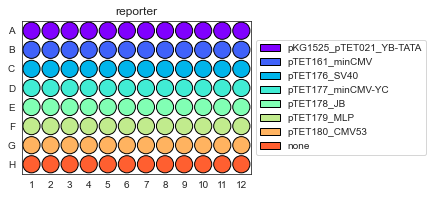

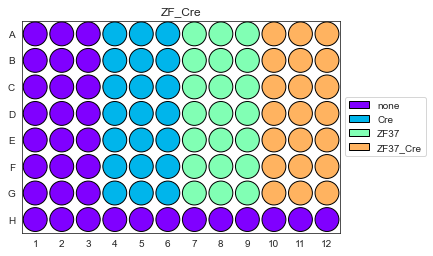

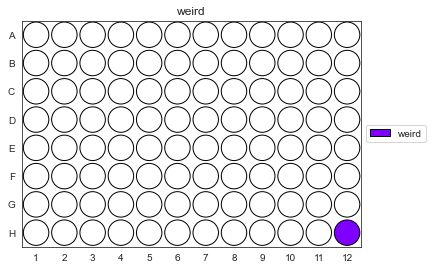

In [3]:
# Import Data - bioreplicate 2
folder = '20241108_ZF-diff-prom_p1'
# instruments\data\attune\Mary\2024.08.26_exp09.16_minCMV\Plate2_minCMV_SRK\export_singlets
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
rd.plot.plot_well_metadata(yaml_path)
data2 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data2['bioreplicate'] = folder

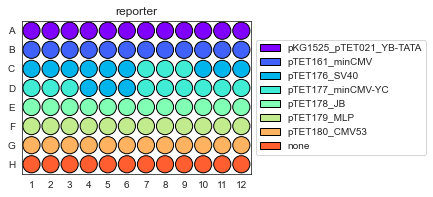

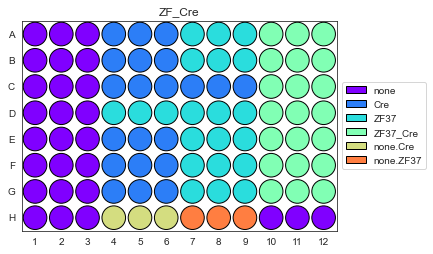

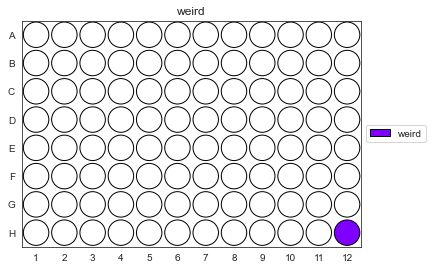

In [4]:
# Import Data - bioreplicate 3
folder = '20241108_ZF-diff-prom_p2_2xPEI'
# instruments\data\attune\Mary\2024.08.26_exp09.16_minCMV\Plate2_minCMV_SRK\export_singlets
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
rd.plot.plot_well_metadata(yaml_path)
data3 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data3['bioreplicate'] = folder

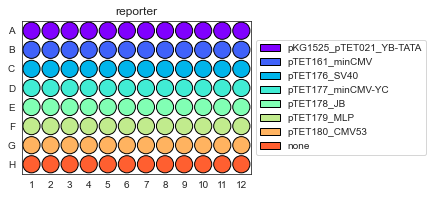

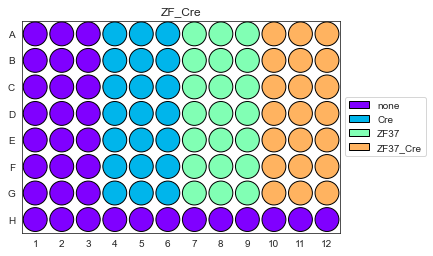

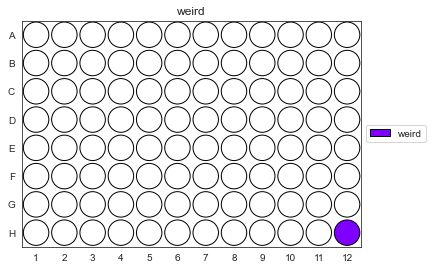

In [5]:
# Import Data - bioreplicate 4
folder = '20241116_ZF-diff-prom'
# instruments\data\attune\Mary\2024.08.26_exp09.16_minCMV\Plate2_minCMV_SRK\export_singlets
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
rd.plot.plot_well_metadata(yaml_path)
data4 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data4['bioreplicate'] = folder

## Concatenate data, promoter assignment

In [6]:
data = pd.concat( [data1, data2,data3, data4], ignore_index=True)
data = data[ data['weird']!= 'weird'] # cells not pipetted correctly 
data = data[ data['mCherry-A'] >0]
data = data[ data['mGL-A'] >0]
data = data[ data['TagBFP-A'] >0]
data = data[ data['Janelia Fluor 549-A'] >0]
data = data[ data['iRFP670-A'] >0]

map_promoters = {'pKG1525_pTET021_YB-TATA': 'YB_TATA', 'pTET161_minCMV': 'minCMV', 
                 'pTET176_SV40':'SV40',
       'pTET177_minCMV-YC':'minCMV2', 
       'pTET178_JB': 'pJB42CAT5', 'pTET179_MLP':'MLP', 'pTET180_CMV53':'CMV53',
       'none': 'no reporter'
}

data['promoter'] = data['reporter'].map(map_promoters)


iRFPgate = 10000 
data_iRFP670gated = data[ (data['iRFP670-A']>iRFPgate) & (data['reporter']!='none')]
data_neg = data[ data['reporter']== 'none']

In [7]:
%store data_neg

Stored 'data_neg' (DataFrame)


# Histograms

## Palette

In [8]:
palette = {'none': 'grey', 
   'Cre': 'black', 
     'ZF37': '#C3DB9A',                                                
      'ZF37_Cre': '#69B645'}

## Stacked histograms for each bio

0
MLP
unstained should show
1
YB_TATA
unstained should show
2
pJB42CAT5
unstained should show
3
minCMV
unstained should show
4
SV40
unstained should show
5
minCMV2
unstained should show
6
CMV53
unstained should show


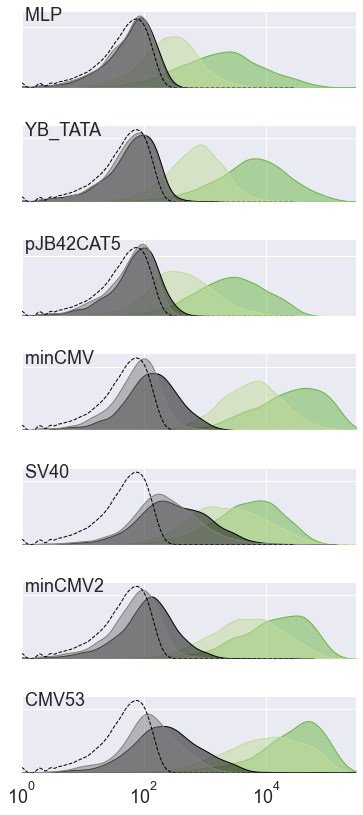

0
MLP
unstained should show
1
YB_TATA
unstained should show
2
pJB42CAT5
unstained should show
3
minCMV
unstained should show
4
SV40
unstained should show
5
minCMV2
unstained should show
6
CMV53
unstained should show


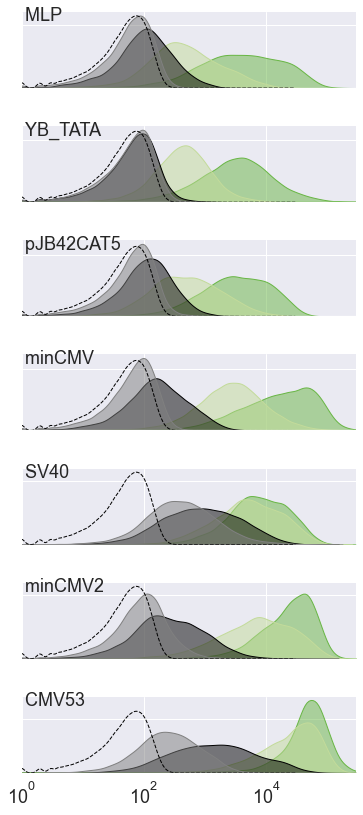

0
MLP
unstained should show
1
YB_TATA
unstained should show
2
pJB42CAT5
unstained should show
3
minCMV
unstained should show
4
SV40
unstained should show
5
minCMV2
unstained should show
6
CMV53
unstained should show


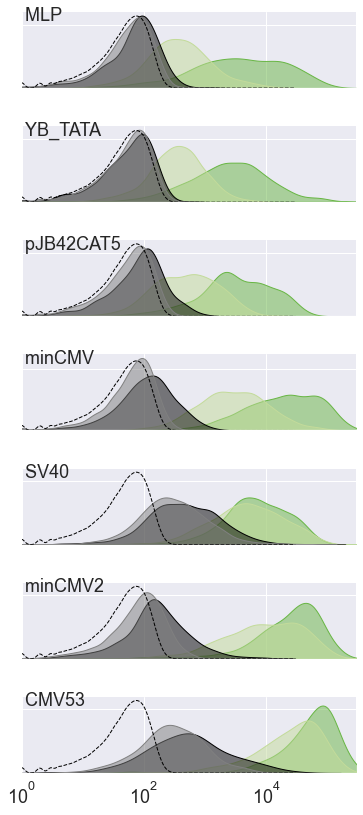

0
MLP
unstained should show
1
YB_TATA
unstained should show
2
pJB42CAT5
unstained should show
3
minCMV
unstained should show
4
SV40
unstained should show
5
minCMV2
unstained should show
6
CMV53
unstained should show


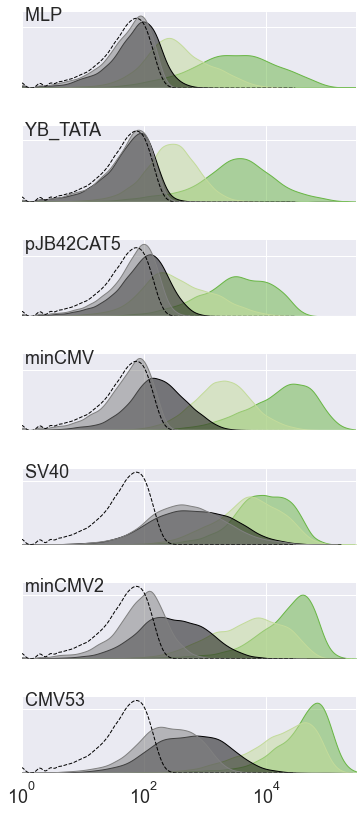

In [9]:
sns.set_theme(font="Arial")

#Create conditions dictionary
conditions = {}
for prom in pd.unique(data_iRFP670gated['promoter']):
    #print(prom)
    conditions[prom] = 'promoter'
#display(conditions)

desired_order = ['MLP',  'YB_TATA','pJB42CAT5', 'minCMV', 'SV40', 'minCMV2', 'CMV53']

conditions = {key: conditions[key] for key in desired_order if key in conditions}

#only data for first bioreplicate
hue = 'ZF_Cre'

for bio in pd.unique(data_iRFP670gated['bioreplicate']):
    data_now_now = data_iRFP670gated[ data_iRFP670gated['bioreplicate']==bio]
    plottitle = ''
    h = custom_hist_plot_stacked( data_now_now, 
                        parameters=pd.array(['mGL-A']), hue=hue, palette=palette, hueorder=palette, title=plottitle, 
                        alpha=0.5, fontsize=18, data_neg= data_neg, conditions=conditions,
                        legendtitle='Condition',  xlim = [1e0, 3e5], xl = 'Output (mGL)', ysize = 2, xsize = 6,
                        axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
    h = h.get_figure()
    plottitle = 'histogram stacked all.'+bio
    h.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

## All bios combined stackked

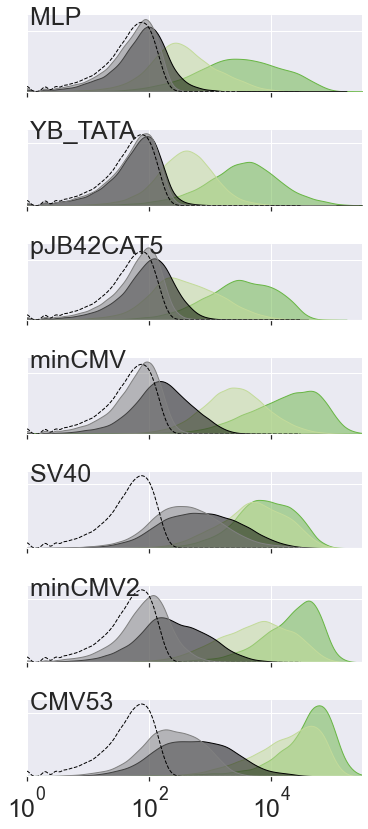

In [10]:
#Create conditions dictionary
conditions = {}
for prom in pd.unique(data_iRFP670gated['promoter']):
    #print(prom)
    conditions[prom] = 'promoter'
#display(conditions)

desired_order = ['MLP','YB_TATA', 'pJB42CAT5','minCMV', 'SV40', 'minCMV2', 'CMV53']

conditions = {key: conditions[key] for key in desired_order if key in conditions}

#only data for first bioreplicate
hue = 'ZF_Cre'

data_now_now = data_iRFP670gated
plottitle = ''
h = custom_hist_plot_stacked2( data_now_now, 
                    parameters=pd.array(['mGL-A']), hue=hue, palette=palette, hueorder=palette, title=plottitle, 
                    alpha=0.5, fontsize=25, data_neg= data_neg, conditions=conditions,
                    legendtitle='Condition',  xlim = [1e0, 3e5], xl = True, ysize = 2, xsize = 6,
                    axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
h = h.get_figure()
plottitle = 'histogram stacked all.allbios'
h.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

## Different histograms for all

unstained should show
unstained should show


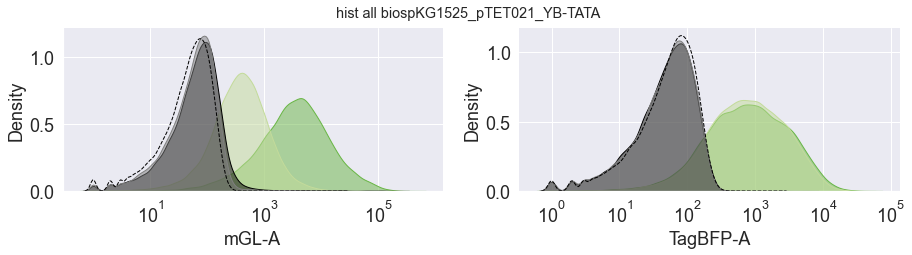

unstained should show
unstained should show


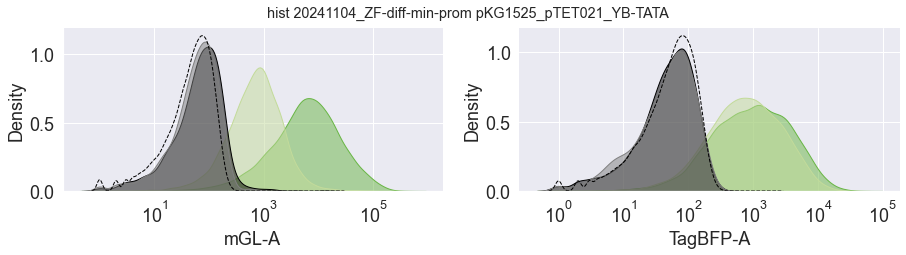

unstained should show
unstained should show


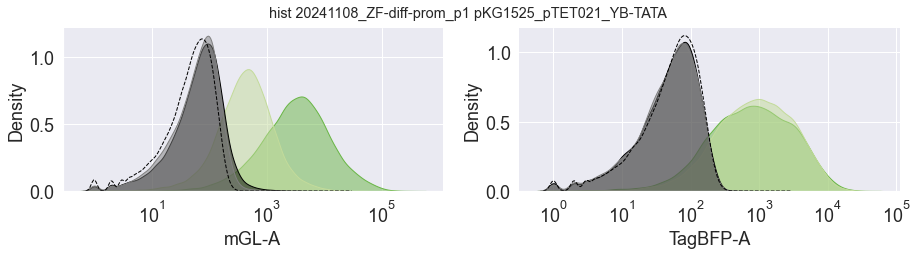

unstained should show
unstained should show


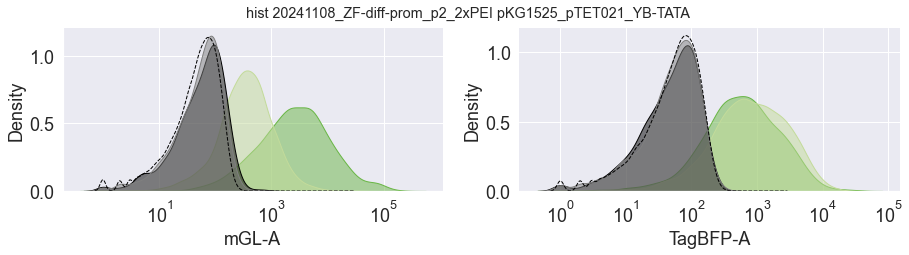

unstained should show
unstained should show


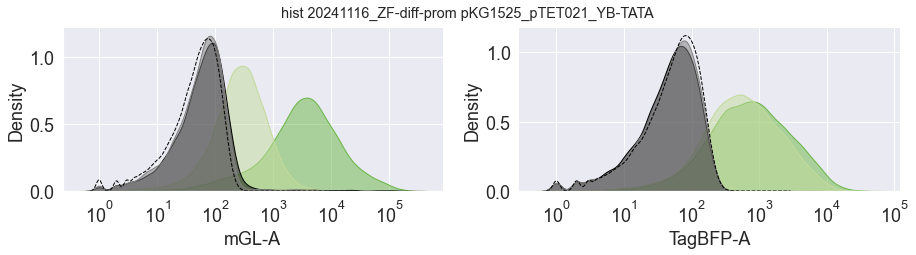

unstained should show
unstained should show


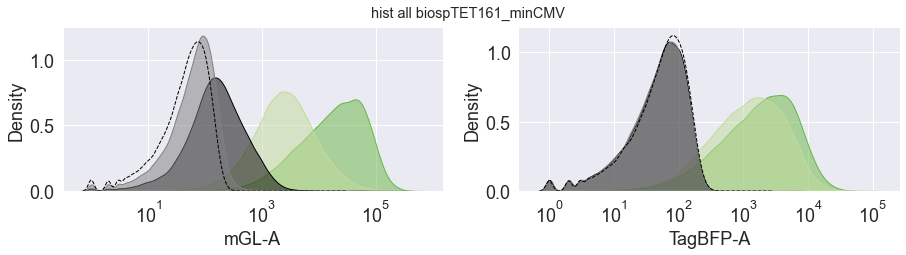

unstained should show
unstained should show


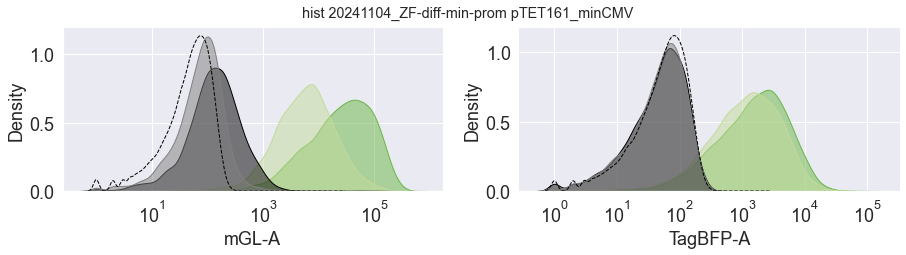

unstained should show
unstained should show


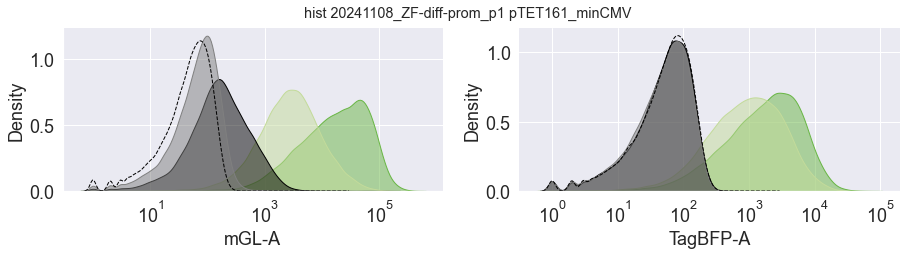

unstained should show
unstained should show


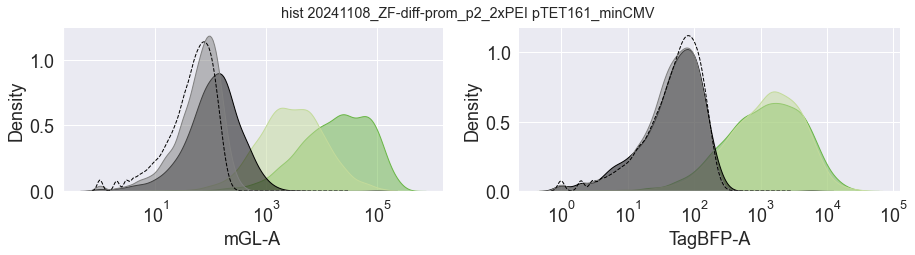

unstained should show
unstained should show


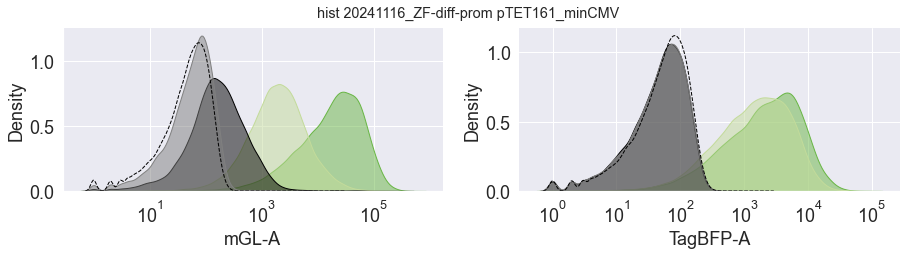

unstained should show
unstained should show


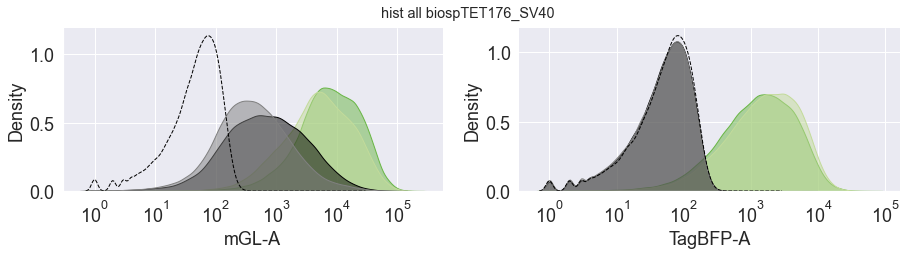

unstained should show
unstained should show


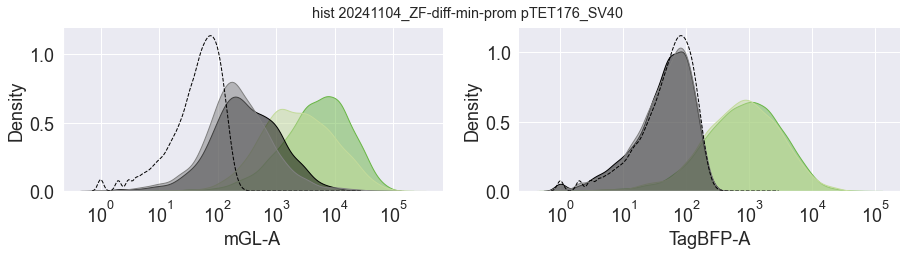

unstained should show
unstained should show


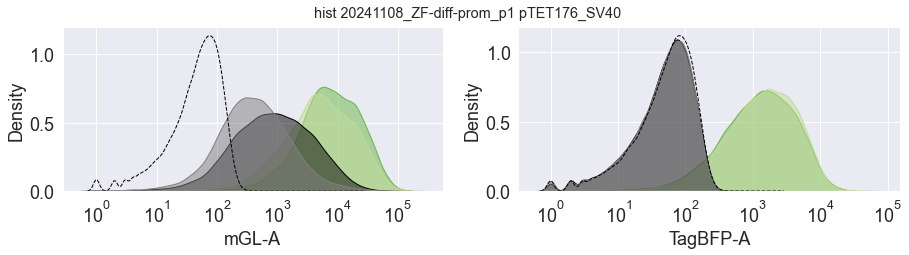

unstained should show
unstained should show


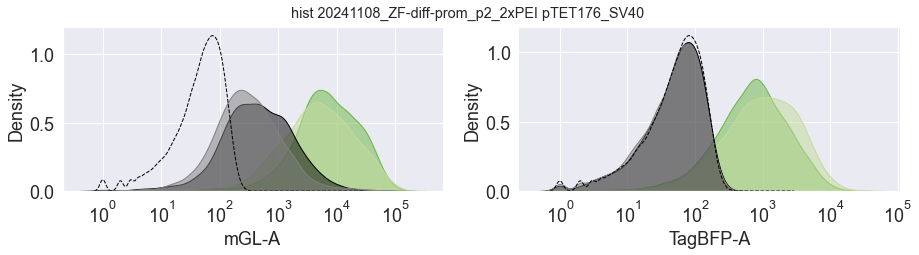

unstained should show
unstained should show


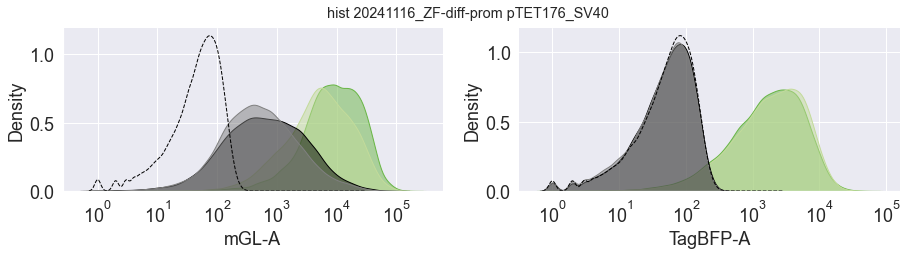

unstained should show
unstained should show


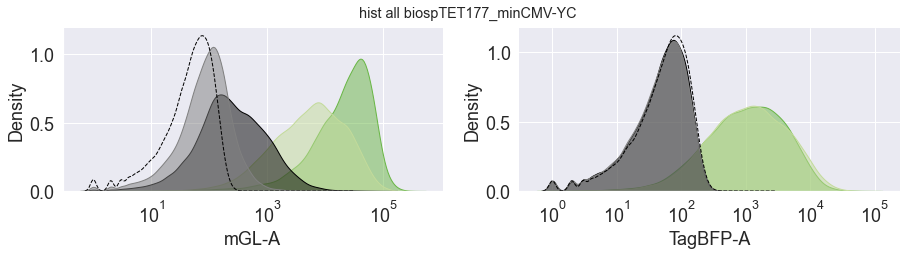

unstained should show
unstained should show


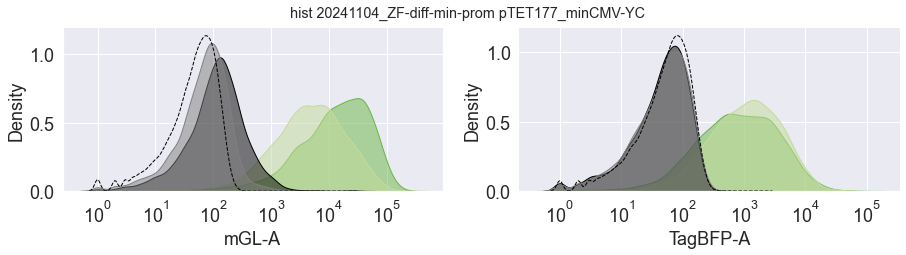

unstained should show
unstained should show


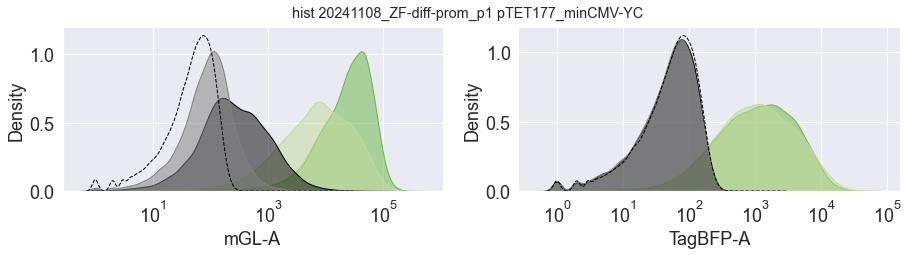

unstained should show
unstained should show


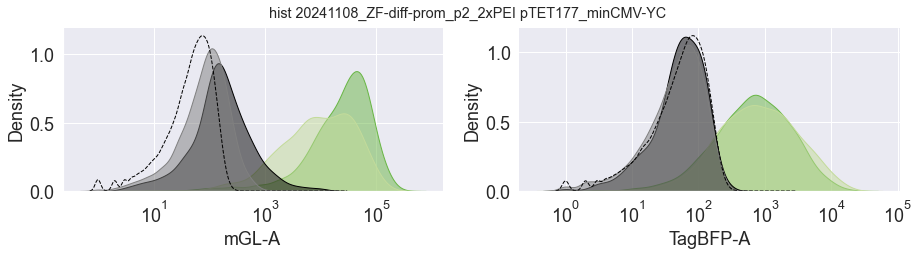

unstained should show
unstained should show


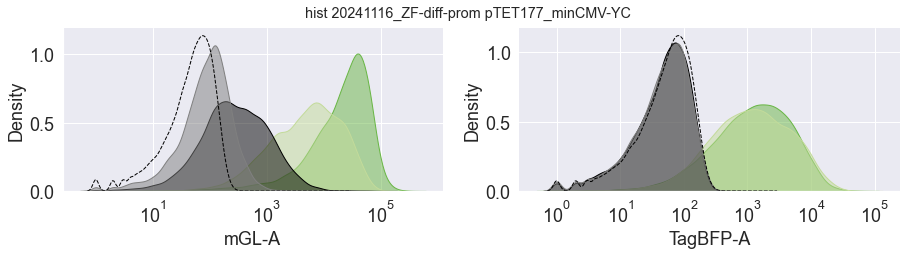

unstained should show
unstained should show


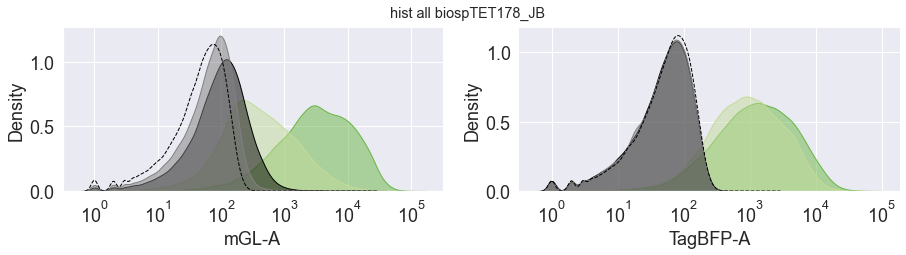

unstained should show
unstained should show


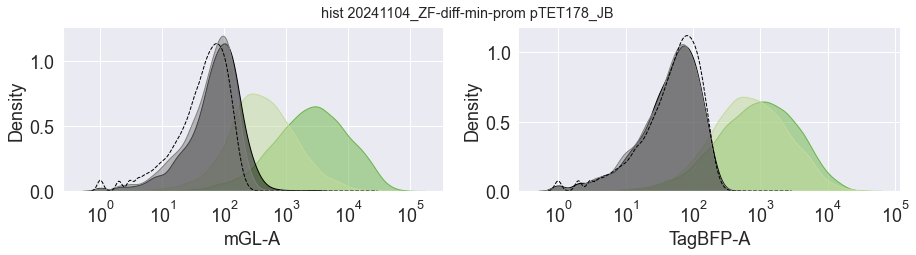

unstained should show
unstained should show


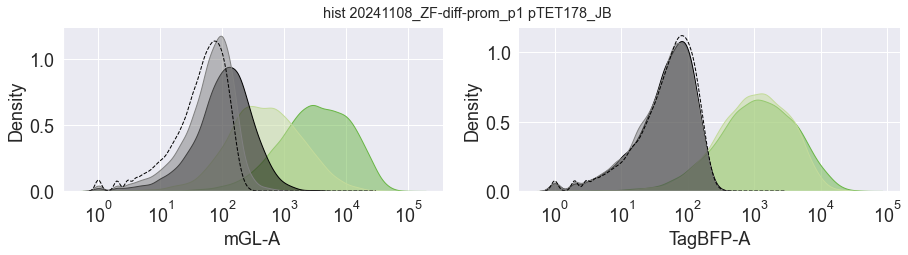

unstained should show
unstained should show


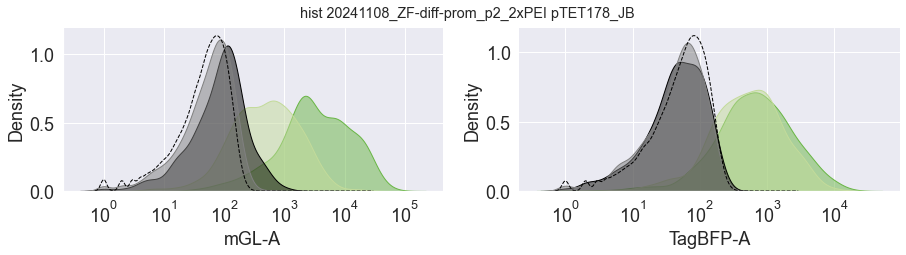

unstained should show
unstained should show


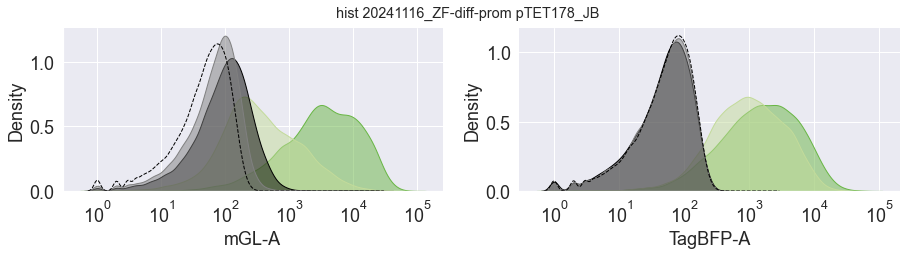

unstained should show
unstained should show


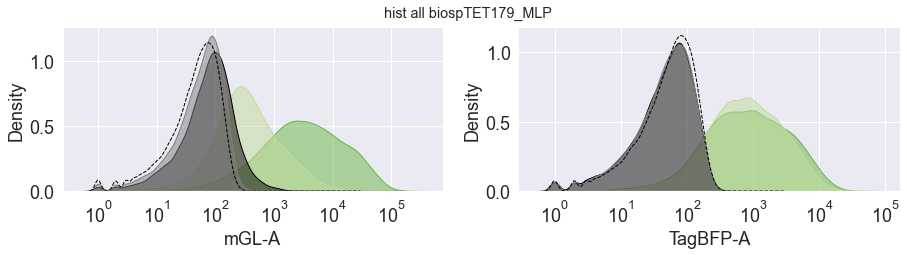

unstained should show
unstained should show


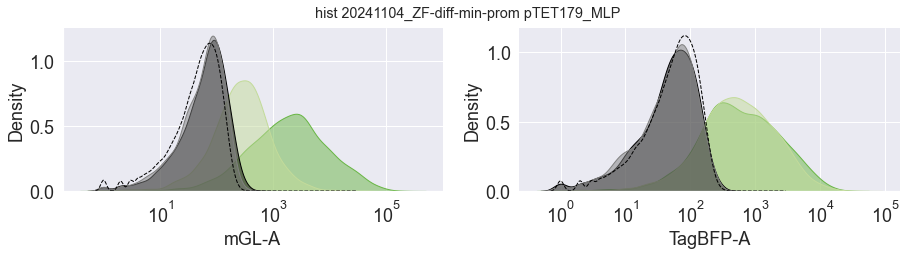

unstained should show
unstained should show


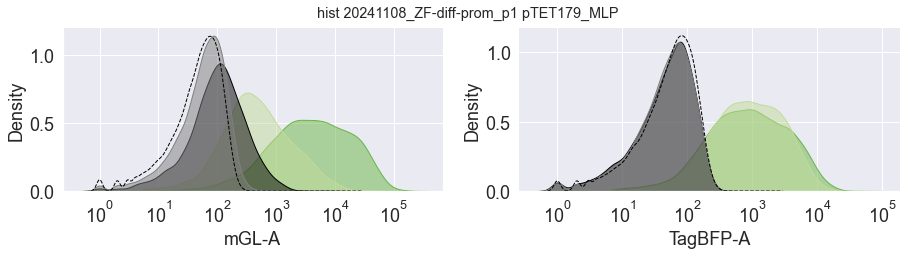

unstained should show
unstained should show


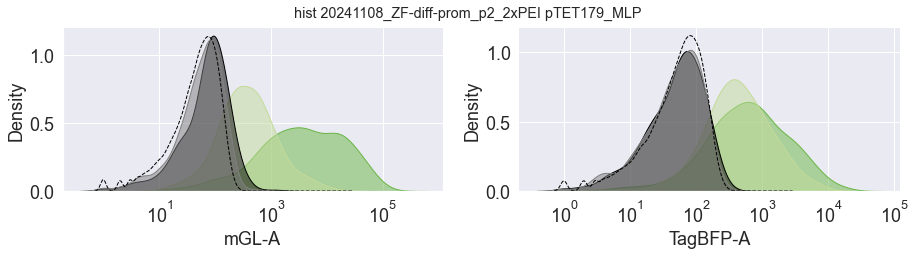

unstained should show
unstained should show


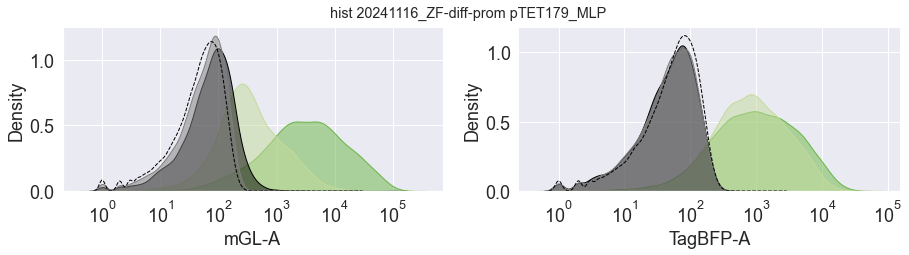

unstained should show
unstained should show


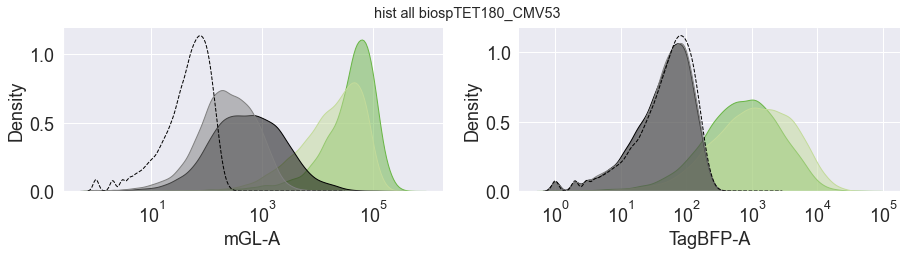

unstained should show
unstained should show


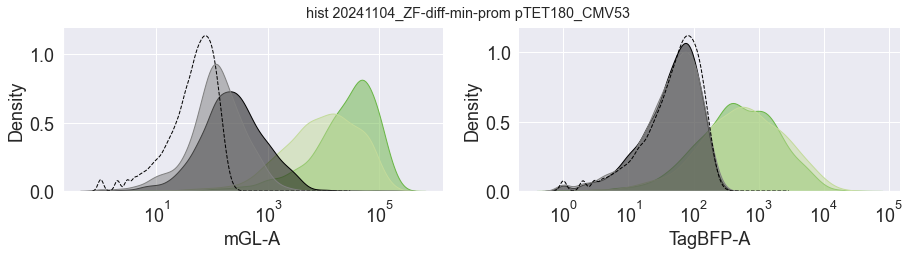

unstained should show
unstained should show


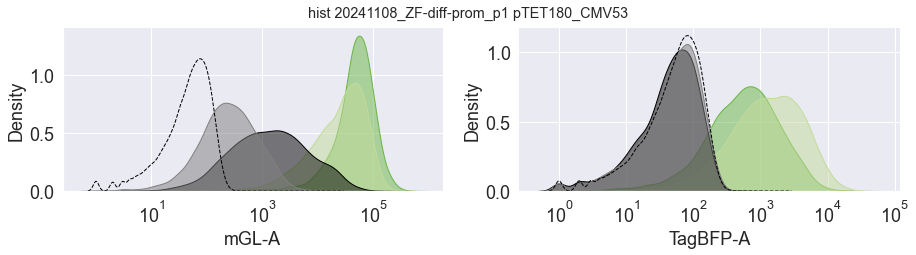

unstained should show
unstained should show


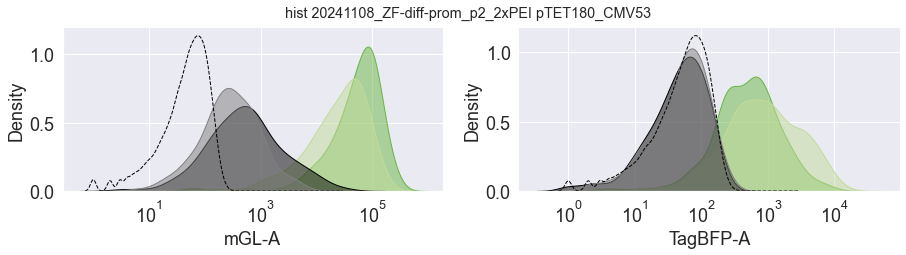

unstained should show
unstained should show


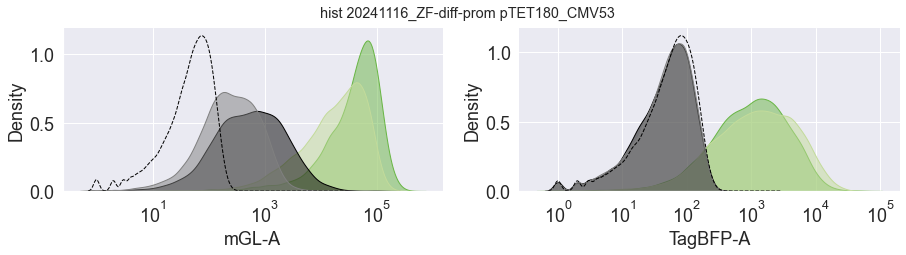

In [11]:
for rept in pd.unique(data_iRFP670gated['reporter']):
    hue = 'ZF_Cre'
    plottitle = 'joint ' + rept
    data_now = data_iRFP670gated[data_iRFP670gated['reporter']==rept]
    # g = custom_density_plot(xcat='mGL-A',ycat='TagBFP-A', hue=hue, data=data_now,
    #                         points = 10000, plottitle=plottitle, 
    #                         palette=palette, alpha=.5, type = ['scatter'],sample=False)
    # g.savefig(figure_folder+ plottitle + '.png',dpi=300,bbox_inches='tight')

    plottitle = 'hist all bios' + rept
    h = custom_hist_plot( data_now, ['mGL-A','TagBFP-A'], hue=hue, palette=palette, hueorder=palette, title=plottitle, 
                         alpha=0.5, fontsize=18, data_neg= data_neg,
                         legendtitle='Condition',  axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
    h = h.get_figure()
    h.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')
    for bio in pd.unique(data_now['bioreplicate']):
        data_now_now = data_now[data_now['bioreplicate']==bio]
        plottitle = 'hist ' + bio + ' ' + rept
        h = custom_hist_plot( data_now_now, ['mGL-A','TagBFP-A'], hue=hue, palette=palette, hueorder=palette, title=plottitle, 
                            alpha=0.5, fontsize=18, data_neg= data_neg,
                            legendtitle='Condition',  axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
        h = h.get_figure()
        h.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')


# Summary Stats Calculations

In [9]:
df = data_iRFP670gated

#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
by = ['reporter', 'promoter', 'ZF_Cre', 'bioreplicate'] #how to filter results, columns 
x = ['mGL-A', 'TagBFP-A', 'mCherry-A'] #which parameter to calculate results on
stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculate
s = calc_stats(df,by,x,stat) #calculate statistics 


# Fold Change Calculation

In [10]:
# normalize all to the +DOX, -GIB conditon with the 203bp spacer

s_repts = s[ s['reporter'] != 'none']
bios = pd.unique(s_repts['bioreplicate'] )
repts = pd.unique(s_repts['reporter'] )

map = {'test':'test'}

for biorep in bios:
    for rept in repts:
        # Normalize all to the noCre ZF37 conditions
        mGL_noCre_ZF37 =  s_repts[ s_repts['ZF_Cre']=='ZF37']
        mGL_noCre_ZF37 =  mGL_noCre_ZF37[ mGL_noCre_ZF37['bioreplicate']==biorep]
        mGL_noCre_ZF37 =  mGL_noCre_ZF37[ mGL_noCre_ZF37['reporter']==rept]
        mGL_noCre_ZF37= mGL_noCre_ZF37['mGL-A_gmean'].iloc[0]
        map[biorep + rept] = mGL_noCre_ZF37
#display(map)

s['map'] = s['bioreplicate'] + s['reporter']
s['ZF'] = s['map'].map(map)
s['Fold Change'] = s['mGL-A_gmean'] / s['ZF']
s.to_excel('FigS6_ZFminpromoter.xlsx',index=False)

df = s
by = ['reporter', 'promoter', 'ZF_Cre' ] #how to filter results, columns 
x = ['Fold Change','mGL-A_gmean', 'TagBFP-A_gmean', 'mCherry-A_gmean' ] #which parameter to calculate results on
stat = [np.mean] #statistics to calculate
s_fold = calc_stats(df,by,x,stat) #calculate statistics 
s_fold[s_fold['ZF_Cre']=='ZF37_Cre'].to_excel('FigS6_ZFminpromoter_foldchangemean.xlsx',index=False)
display(s_fold[s_fold['ZF_Cre']=='ZF37_Cre'])
display(s_fold)

,reporter,promoter,ZF_Cre,Fold Change_mean,mGL-A_gmean_mean,TagBFP-A_gmean_mean,mCherry-A_gmean_mean,Fraction,Count
2,pKG1525_pTET021_YB-TATA,YB_TATA,ZF37_Cre,8.687033,3517.731541,724.125846,47.347007,0.25,4
6,pTET161_minCMV,minCMV,ZF37_Cre,6.242537,18059.960035,1469.618974,47.057893,0.25,4
10,pTET176_SV40,SV40,ZF37_Cre,1.655020,6700.309205,1035.707681,46.724436,0.25,4
14,pTET177_minCMV-YC,minCMV2,ZF37_Cre,3.089527,18225.024522,873.581996,45.512239,0.25,4
18,pTET178_JB,pJB42CAT5,ZF37_Cre,6.948742,2874.543319,980.414209,46.719806,0.25,4
22,pTET179_MLP,MLP,ZF37_Cre,8.199973,2922.717387,717.346066,47.104367,0.25,4
26,pTET180_CMV53,CMV53,ZF37_Cre,2.231633,37992.589310,601.111409,43.472648,0.25,4


,reporter,promoter,ZF_Cre,Fold Change_mean,mGL-A_gmean_mean,TagBFP-A_gmean_mean,mCherry-A_gmean_mean,Fraction,Count
0,pKG1525_pTET021_YB-TATA,YB_TATA,Cre,0.153372,57.377875,43.523049,49.512815,0.25,4
1,pKG1525_pTET021_YB-TATA,YB_TATA,ZF37,1.000000,419.252114,710.164640,47.067481,0.25,4
2,pKG1525_pTET021_YB-TATA,YB_TATA,ZF37_Cre,8.687033,3517.731541,724.125846,47.347007,0.25,4
3,pKG1525_pTET021_YB-TATA,YB_TATA,none,0.138637,51.691431,43.698366,48.445774,0.25,4
4,pTET161_minCMV,minCMV,Cre,0.050787,135.823021,43.735530,49.630973,0.25,4
5,pTET161_minCMV,minCMV,ZF37,1.000000,3222.900743,1097.743014,47.948503,0.25,4
6,pTET161_minCMV,minCMV,ZF37_Cre,6.242537,18059.960035,1469.618974,47.057893,0.25,4
7,pTET161_minCMV,minCMV,none,0.020801,59.458616,43.250769,47.990707,0.25,4
8,pTET176_SV40,SV40,Cre,0.129265,544.144680,44.473844,49.559271,0.25,4
9,pTET176_SV40,SV40,ZF37,1.000000,4200.591039,1138.741096,47.291580,0.25,4


# Summary Plots 

In [13]:
pairs = []
for i in range(len(pd.unique(s['promoter']))):
    rept = pd.unique(s['promoter'])[i]
    if i == 0:
      pairs = [[(rept, 'ZF37'), (rept, 'ZF37_Cre')]]
      pairs2 = [[(rept, 'Cre'), (rept, 'ZF37')]]
      pairs3 = [[(rept, 'none'), (rept, 'Cre')]]
    else:
      pairs = pairs + [[(rept, 'ZF37'), (rept, 'ZF37_Cre')]]
      pairs2 = pairs2 + [[(rept, 'Cre'), (rept, 'ZF37')]]
      pairs3 = pairs3 + [[(rept, 'none'), (rept, 'Cre')]]

pairs = pairs + pairs2 + pairs3

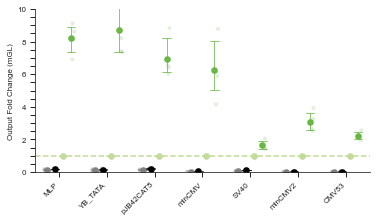

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

minCMV2_Cre v.s. minCMV2_ZF37: t-test independent samples, P_val=7.882e-04 stat=-6.234e+00
CMV53_Cre v.s. CMV53_ZF37: t-test independent samples, P_val=2.147e-03 stat=-5.135e+00
minCMV_ZF37 v.s. minCMV_ZF37_Cre: t-test independent samples, P_val=2.702e-04 stat=-7.600e+00
pJB42CAT5_ZF37 v.s. pJB42CAT5_ZF37_Cre: t-test independent samples, P_val=5.240e-06 stat=-1.514e+01
SV40_Cre v.s. SV40_ZF37: t-test independent samples, P_val=1.347e-03 stat=-5.627e+00
minCMV_none v.s. minCMV_Cre: t-test independent samples, P_val=8.576e-04 stat=-6.136e+00
SV40_none v.s. SV40_Cre: t-test independent samples, P_val=1.914e-01 stat=-1.472e+00
YB_TATA_ZF37 v.s. YB_TATA_ZF37_Cre: t-test independent samples, P_val=4.319e-03 stat=-4.452e+00
pJB42CAT5_none v.s. pJB42CAT5_Cre: t-test independent samples, P_val=9.285e-03 stat=-3.770e+00
MLP_ZF37 v.s. 

<Figure size 432x288 with 0 Axes>

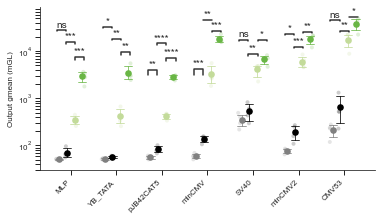

<Figure size 432x288 with 0 Axes>

In [15]:

x = 'promoter'; x_rot = 45
xlabel = ''
xsize =6  ; ysize = 3
fontsize = 8
 
yscales = pd.array(['log'])
ylim = [0,10]
pairs = pairs
palette = {'none': 'grey', 
   'Cre': 'black', 
     'ZF37': '#C3DB9A',                                                
      'ZF37_Cre': '#69B645'}
hue = 'ZF_Cre';  hueorder = palette;
order =  s[s['ZF_Cre']=='ZF37'].groupby('promoter')['mGL-A_gmean'].mean().sort_values().index
data_now = s

y = 'Fold Change'
ylabel = 'Output Fold Change (mGL)'
yscale = 'linear'
plottitle = y
g = plt.figure(figsize=(xsize,ysize))
plt.axhline(y=1, ls='--', color='#C3DB9A')
g = summary_plot( x, y, hue, data=data_now, dodge=True, palette = palette, order=order, 
                hue_order = hueorder, plottitle='',yscale=yscale,x_rot = x_rot,
                ylim =ylim, fontsize=fontsize,ylabel=ylabel,xlabel=xlabel,xticklabels=True,
                pairs=[], scientific=False, legend=False )
g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

y = 'mGL-A_gmean'
ylabel = 'Output gmean (mGL)'
yscale = 'log'
ylim = [3e1, 5e4]
plottitle = y
g = plt.figure(figsize=(xsize,ysize))
g = summary_plot( x, y, hue, data=data_now, dodge=True, palette = palette, order=order, 
                hue_order = hueorder, plottitle='',yscale=yscale,x_rot = x_rot,
                ylim =ylim, fontsize=fontsize, ylabel=ylabel, xticklabels=True, xlabel=xlabel,
                pairs=pairs, legend=False)
g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

